In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import copy

In [3]:
df = pd.read_csv("D:/practice/linear/linear.csv")
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """Entry point for launching an IPython kernel.


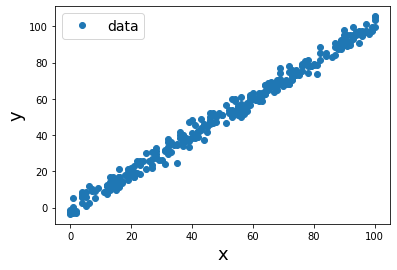

In [5]:
plt.plot('x','y',data = df, marker = 'o', linestyle = '', label = 'data')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

In [7]:
x = df['x'].tolist()
y = df['y'].tolist()

In [9]:
# Don't forget - adding ones to the x matrix
xb = np.c_[np.ones((len(x),1)),x]
xb

array([[  1.,  77.],
       [  1.,  21.],
       [  1.,  22.],
       [  1.,  20.],
       [  1.,  36.],
       [  1.,  15.],
       [  1.,  62.],
       [  1.,  95.],
       [  1.,  20.],
       [  1.,   5.],
       [  1.,   4.],
       [  1.,  19.],
       [  1.,  96.],
       [  1.,  62.],
       [  1.,  36.],
       [  1.,  15.],
       [  1.,  65.],
       [  1.,  14.],
       [  1.,  87.],
       [  1.,  69.],
       [  1.,  89.],
       [  1.,  51.],
       [  1.,  89.],
       [  1.,  27.],
       [  1.,  97.],
       [  1.,  58.],
       [  1.,  79.],
       [  1.,  21.],
       [  1.,  93.],
       [  1.,  27.],
       [  1.,  99.],
       [  1.,  31.],
       [  1.,  33.],
       [  1.,  80.],
       [  1.,  28.],
       [  1.,  47.],
       [  1.,  53.],
       [  1.,  69.],
       [  1.,  28.],
       [  1.,  33.],
       [  1.,  91.],
       [  1.,  71.],
       [  1.,  50.],
       [  1.,  76.],
       [  1.,   4.],
       [  1.,  37.],
       [  1.,  70.],
       [  1.,

In [10]:
# calculate linear regression parameters theta using the normal equation
thetaHat = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
thetaHat
# thetaHat[0] is intercept, thetaHat[1] is slope. This is determined by the column order of matrix xb.

array([-0.46181077,  1.01433536])

C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


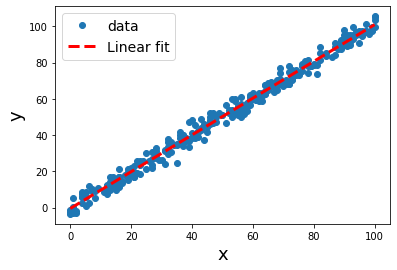

In [11]:
# plot the fit and the data
xFit = np.linspace(0,100,num = 200)
xFitb = np.c_[np.ones((len(xFit),1)), xFit]
yFit = xFitb.dot(thetaHat)

plt.plot('x','y',data = df, marker = 'o', linestyle = '', label = 'data')
plt.plot(xFit, yFit, color = 'r', lw = 3, linestyle = '--', label = 'Linear fit')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

In [12]:
# create the model
lin_reg = LinearRegression()
# format x so that LinearRegression recognize it.
x = np.array(x).reshape(-1,1)
# fit the model
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(-0.4618107736611776, array([1.01433536]))

In [13]:
xb = sm.add_constant(x) # again, add a column of ones to x
model = sm.OLS(y,xb) # OLS = Ordinary Least Squares
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          1.33e-294
Time:                        12:12:01   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4618      0.360     -1.284      0.2

In [14]:
learningRate = 0.0002
numIterations = 100000
y = np.array(y).reshape(-1,1)
m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xb.T.dot(xb.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient

In [15]:
theta

array([[-0.46180754],
       [ 1.01433531]])

In [16]:
# define the function to calculate MSE
# can also use sklearn.metrics.mean_squared_error
def MSE(xb,y,theta):
    return np.sum(np.square(xb.dot(theta)-y))/len(y)


In [17]:
learningRate = 0.0002
numIterations = 100000
y = np.array(y).reshape(-1,1)
m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

cost = []
# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xb.T.dot(xb.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xb,y,theta))

Text(0, 0.5, 'MSE')

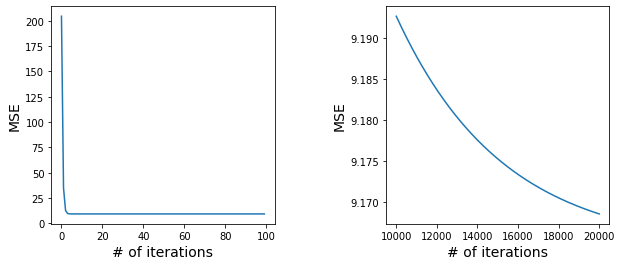

In [18]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(range(0,100),cost[0:100])
ax[1].plot(range(10000,20001), cost[10000:20001])
plt.subplots_adjust(wspace=0.5)
ax[0].set_xlabel('# of iterations', fontsize = 14)
ax[1].set_xlabel('# of iterations', fontsize = 14)
ax[0].set_ylabel('MSE', fontsize = 14)
ax[1].set_ylabel('MSE', fontsize = 14)

Text(0, 0.5, 'MSE')

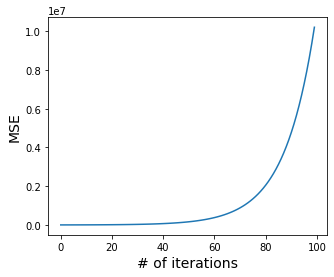

In [19]:
learningRate = 0.0003
numIterations = 100
y = np.array(y).reshape(-1,1)
m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

cost = []
# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xb.T.dot(xb.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xb,y,theta))

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4))
ax.plot(range(0,100), cost[0:100])
ax.set_xlabel('# of iterations', fontsize = 14)
ax.set_ylabel('MSE', fontsize = 14)

In [29]:
theta = np.random.randn(2,1)
gradient = 2/m * xb.T.dot(xb.dot(theta) - y)
print(gradient)

[[  -29.11487554]
 [-1973.26813291]]


In [30]:
xbStandard = copy.deepcopy(xb) # we don't want to mess with xb! xbStandard = xb will lead to xb being normalized, too.
# save the shift and scaling
mu = np.mean(xbStandard[:,1]) 
sigma = np.std(xbStandard[:,1])
# standardization
xbStandard[:,1]=(xbStandard[:,1]-mu)/sigma
print(xbStandard[0:5])
print(mu)
print(sigma)

[[ 1.          0.91589319]
 [ 1.         -1.05200623]
 [ 1.         -1.01686517]
 [ 1.         -1.08714729]
 [ 1.         -0.52489032]]
50.93666666666667
28.456738901161685


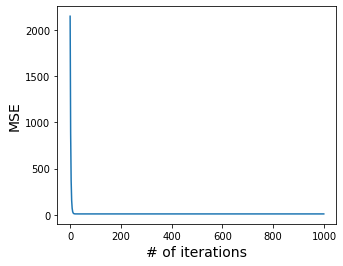

In [31]:
learningRate = 0.1
numIterations = 1000

m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

cost = []
# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xbStandard.T.dot(xbStandard.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xbStandard,y,theta))

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4))
plt.plot(cost)
ax.set_xlabel('# of iterations', fontsize = 14)
ax.set_ylabel('MSE', fontsize = 14)
plt.show()

In [32]:
print(theta)

[[51.2050511 ]
 [28.86467636]]


C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


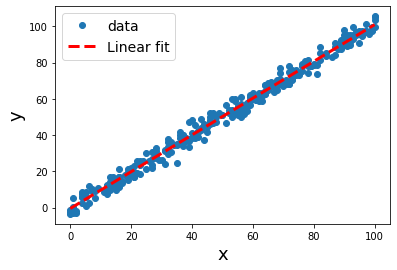

In [34]:
xFit = np.linspace(0,100,num = 200)
xFitStandard = (xFit - mu)/sigma # use the previously saved mean and standard deviation
xFitStandardb = np.c_[np.ones((len(xFitStandard),1)), xFitStandard]
yFit = xFitStandardb.dot(theta)

plt.plot('x','y',data = df, marker = 'o', linestyle = '', label = 'data')
plt.plot(xFit, yFit, color = 'r', lw = 3, linestyle = '--', label = 'Linear fit')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

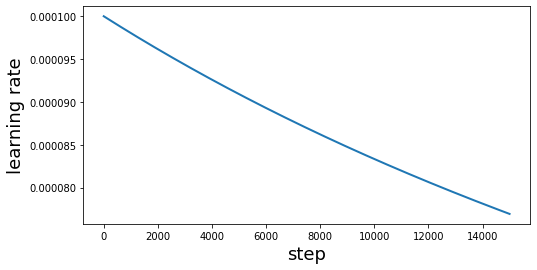

In [35]:
numEpochs = 1000

# a simple learning schedule
def learningSchedule(step):
    return 5/(50000 + step)

# visualize the learning schedule
s = np.linspace(0,15000, num = 15001)
l = learningSchedule(s)
m = len(y) # sample size 

fig, ax = plt.subplots(figsize = (8,4))
plt.plot(s,l, lw = 2)
#plt.xlim(0,15000)
plt.xlabel('step', fontsize = 18)
plt.ylabel('learning rate', fontsize = 18)
plt.show()

In [36]:
theta = np.random.randn(2,1)

cost = []
for epoch in range(numEpochs):
    for i in range(m):
        idx = np.random.randint(m) # 0,1,...,m-1
        xbi = xb[idx:idx+1]
        yi = y[idx:idx+1]
        gradient = 2*xbi.T.dot(xbi.dot(theta)-yi) # sample size is one
        learningRate = learningSchedule(epoch*m + i) # step = epoch*m + i
        theta = theta - learningRate * gradient
        cost.append(MSE(xb,y,theta))

In [37]:
theta

array([[-0.4796869 ],
       [ 1.03752107]])

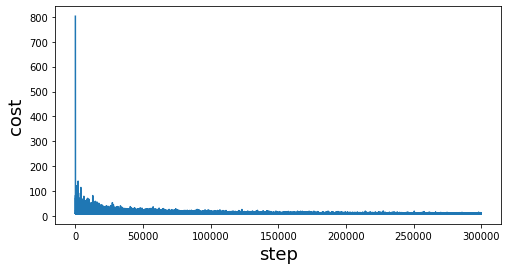

In [38]:
fig, ax = plt.subplots(figsize = (8,4))
plt.plot(cost)
#plt.xlim(0,20000)
plt.ylabel('cost', fontsize = 18)
plt.xlabel('step', fontsize = 18)
plt.show()

In [39]:
numEpochs = 100

# a simple learning schedule
def learningSchedule(step):
    return 5/(10000 + step)

theta = np.random.randn(2,1)

cost = []
for epoch in range(numEpochs):
    for i in range(m):
        idx = np.random.randint(m) # 0,1,...,m-1
        xbi = xb[idx:idx+1]
        yi = y[idx:idx+1]
        gradient = 2*xbi.T.dot(xbi.dot(theta)-yi) # sample size is one
        learningRate = learningSchedule(epoch*m + i) # step = epoch*m + i
        theta = theta - learningRate * gradient
        cost.append(MSE(xb,y,theta))

C:\Users\praveen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


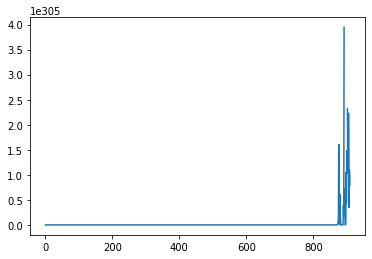

In [40]:
plt.plot(cost)
plt.show()

In [41]:
from sklearn.linear_model import SGDRegressor

In [42]:
# max_iter is the total number of epochs, eta0 is the starting learning rate
# penalty = None, meaning there is no regularization.
model = SGDRegressor(eta0 = 0.0005, penalty = None, max_iter = 10000)
model.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [43]:
model.intercept_, model.coef_

(array([-0.02758935]), array([1.01791139]))

In [44]:
from sklearn.utils import shuffle

In [45]:
batchsize = 30 # size of each of the mini batch
theta = np.random.randn(2,1)

numEpochs = 5000
learningRate = 0.0002

for epoch in range(numEpochs):
    xbShuffled, yShuffled = shuffle(xb, y) # shuffle your dataset at the beginning of each epoch.
    for i in range(0, xbShuffled.shape[0], batchsize):
        xbi = xbShuffled[i:i+batchsize]
        yi = yShuffled[i:i+batchsize]
        gradient = 2/batchsize*xbi.T.dot(xbi.dot(theta)-yi)
        theta = theta - learningRate*gradient

In [46]:
theta

array([[-0.45879504],
       [ 1.01333666]])

# Polynomial Regression
The above simple linear regression model can be easily extended to a polynomial regression model. To illustrate polynomial regression, we will use another dataset:

In [47]:
df1 = pd.read_csv("D:/practice/linear/advanced.csv")
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


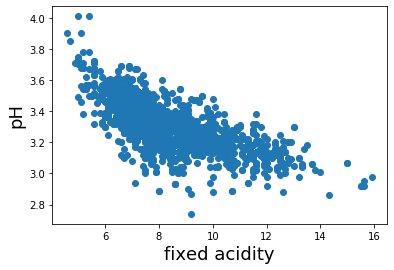

In [48]:
plt.plot('fixed acidity','pH', data = df1, marker = 'o', linestyle = '') # fixed acidity, pH
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

In [50]:
reg = LinearRegression()
x = df1['fixed acidity'].as_matrix().reshape(-1,1)
y = df1['pH'].as_matrix().reshape(-1,1)
reg.fit(x,y)

C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

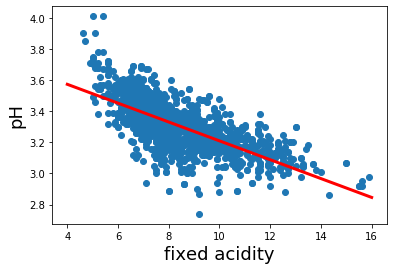

In [52]:
xFit = np.linspace(4,16,num=100).reshape(-1,1)
yFit = reg.predict(xFit)
plt.plot('fixed acidity','pH', data = df1, marker = 'o', linestyle = '') 
plt.plot(xFit,yFit, color = 'r',lw=3)
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

In [53]:
# compute MSE
xb = np.c_[np.ones((len(x),1)),x]
theta = np.array([reg.intercept_[0],reg.coef_[0][0]]).reshape(-1,1)

linMSE = MSE(xb,y,theta)
print(linMSE)

0.012709087835248859


In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly = PolynomialFeatures(degree=2, include_bias = False)
xPoly = poly.fit_transform(x)
print(xPoly[0:5])

[[  7.4   54.76]
 [  7.8   60.84]
 [  7.8   60.84]
 [ 11.2  125.44]
 [  7.4   54.76]]


In [56]:
reg = LinearRegression()
reg.fit(xPoly,y)
print(reg.intercept_, reg.coef_)

[4.34821937] [[-0.18225037  0.00663222]]


In [57]:
xFit=np.linspace(4,16,num=100).reshape(-1,1)
xFit=poly.fit_transform(xFit)
#print(xFit[0:5])
yFit = reg.predict(xFit)

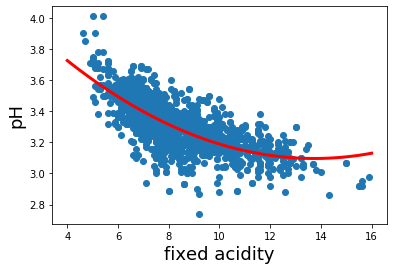

In [59]:
plt.plot('fixed acidity','pH', data = df1, marker = 'o', linestyle = '') 
plt.plot(xFit[:,0],yFit, color = 'r',lw=3)
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

In [60]:
# compute MSE
xb = np.c_[np.ones((len(x),1)),xPoly]
theta = np.array([reg.intercept_[0],reg.coef_[0][0],reg.coef_[0][1]]).reshape(-1,1)

polyMSE = MSE(xb,y,theta)
print(polyMSE)

0.011836731145634343


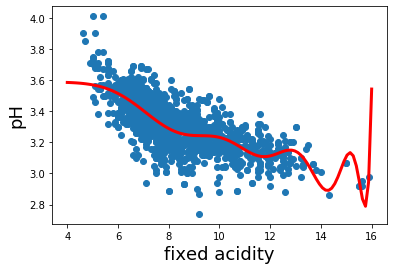

In [62]:
#if we do polynomial degree = 20?
poly = PolynomialFeatures(degree=20, include_bias = False)
xPoly = poly.fit_transform(x)
#print(xPoly[0:1])

reg = LinearRegression()
reg.fit(xPoly,y)

xFit = np.linspace(4,16,num=100).reshape(-1,1)
xFit = poly.fit_transform(xFit)
yFit = reg.predict(xFit)
plt.plot('fixed acidity','pH', data = df1, marker = 'o', linestyle = '') 
plt.plot(xFit[:,0],yFit, color = 'r',lw=3)
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()